# Embeddings and Similarity for RAG Systems: A Practical Guide

This guide provides a **simplified and practical introduction** to text embeddings and similarity calculations for building Retrieval-Augmented Generation (RAG) systems. We'll focus on real-world applications, practical techniques, and decision frameworks to help you implement these concepts in your projects.

## Table of Contents

1. [Introduction to Embeddings](#introduction-to-embeddings)
2. [Embeddings in Practice](#embeddings-in-practice)
3. [Popular Embedding Models](#popular-embedding-models)
4. [Understanding Similarity Metrics](#understanding-similarity-metrics)
5. [Building RAG Systems with Embeddings](#building-rag-systems-with-embeddings)
6. [Practical Decision Guide](#practical-decision-guide)
7. [Implementation Considerations](#implementation-considerations)
8. [Conclusion and Resources](#conclusion-and-resources)

## Introduction to Embeddings

### What are embeddings?

Embeddings are **numerical representations** of information such as text, images, or audio that capture their meaning in a way computers can understand. Think of embeddings as **coordinates in a "meaning space"** where similar items are positioned closer together.

![Embeddings Visualization](https://miro.medium.com/v2/resize:fit:1400/1*sXNXYfAqfLUeiDXPCo130w.png)
*Image source: Towards Data Science - Embeddings explained as coordinates in a meaning space*

### Why embeddings matter for modern applications

Embeddings have revolutionized how AI systems understand and process information by:

- Allowing systems to grasp **semantic relationships** between words and concepts
- Enabling **similarity searches** based on meaning rather than just keywords
- Powering modern **recommendation systems** and **search engines**
- Forming the foundation for **Retrieval-Augmented Generation (RAG)** systems

As one developer explained it: "If traditional keyword search is like looking for exact puzzle pieces, embedding-based search is like finding pieces that fit together based on their shape."

## Embeddings in Practice

### How embeddings capture meaning

Embeddings work by distilling the essence of information into numerical patterns:

1. **Context matters**: Words appearing in similar contexts have similar embeddings
2. **Relationships are preserved**: The relationships between concepts are encoded in the vector space
3. **Arithmetic works**: You can perform operations like: embedding("king") - embedding("man") + embedding("woman") ≈ embedding("queen")

![Embedding Arithmetic](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRNiaZQxOZG-4_K46_xHsykJkrQoLSa1w-7oA&s)
*Image source: Towards AI - King-Man+Woman=Queen visualization*

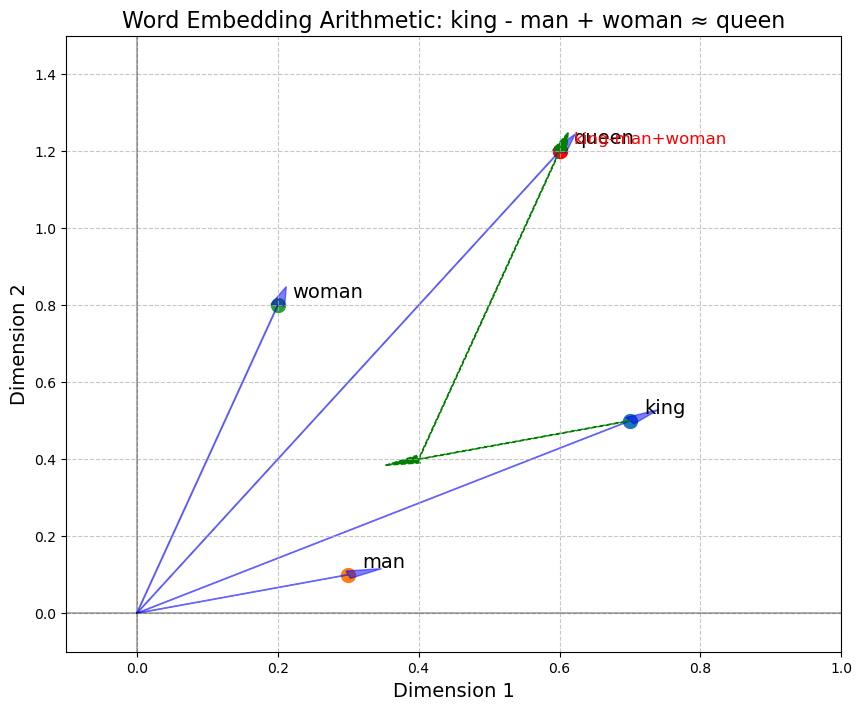

Distance between 'king-man+woman' and 'queen': 0.0000


In [1]:
# Visualize word embedding arithmetic in 2D space
import numpy as np
import matplotlib.pyplot as plt

# Create a simplified 2D representation for visualization
# These are simplified vectors for illustration purposes only
word_vectors = {
    'king': np.array([0.7, 0.5]),
    'man': np.array([0.3, 0.1]),
    'woman': np.array([0.2, 0.8]),
    'queen': np.array([0.6, 1.2])
}

# Calculate king - man + woman
result_vector = word_vectors['king'] - word_vectors['man'] + word_vectors['woman']

# Create a plot
plt.figure(figsize=(10, 8))

# Plot original word vectors
for word, vec in word_vectors.items():
    plt.scatter(vec[0], vec[1], s=100)
    plt.text(vec[0]+0.02, vec[1]+0.02, word, fontsize=14)

# Plot the result vector
plt.scatter(result_vector[0], result_vector[1], s=100, color='red')
plt.text(result_vector[0]+0.02, result_vector[1]+0.02, 'king-man+woman', fontsize=12, color='red')

# Plot vector operations with arrows
plt.arrow(0, 0, word_vectors['king'][0], word_vectors['king'][1], 
          head_width=0.02, head_length=0.05, fc='blue', ec='blue', alpha=0.5)
plt.arrow(0, 0, word_vectors['man'][0], word_vectors['man'][1], 
          head_width=0.02, head_length=0.05, fc='blue', ec='blue', alpha=0.5)
plt.arrow(0, 0, word_vectors['woman'][0], word_vectors['woman'][1], 
          head_width=0.02, head_length=0.05, fc='blue', ec='blue', alpha=0.5)
plt.arrow(0, 0, word_vectors['queen'][0], word_vectors['queen'][1], 
          head_width=0.02, head_length=0.05, fc='blue', ec='blue', alpha=0.5)

# Draw the operation
plt.arrow(word_vectors['king'][0], word_vectors['king'][1], 
          -word_vectors['man'][0], -word_vectors['man'][1], 
          head_width=0.02, head_length=0.05, fc='green', ec='green', linestyle='dashed')
plt.arrow(word_vectors['king'][0] - word_vectors['man'][0], 
          word_vectors['king'][1] - word_vectors['man'][1], 
          word_vectors['woman'][0], word_vectors['woman'][1], 
          head_width=0.02, head_length=0.05, fc='green', ec='green', linestyle='dashed')

plt.title('Word Embedding Arithmetic: king - man + woman ≈ queen', fontsize=16)
plt.xlabel('Dimension 1', fontsize=14)
plt.ylabel('Dimension 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlim(-0.1, 1.0)
plt.ylim(-0.1, 1.5)
plt.show()

# Calculate distance between result and queen vector to verify
distance = np.linalg.norm(result_vector - word_vectors['queen'])
print(f"Distance between 'king-man+woman' and 'queen': {distance:.4f}")

### Dimensions and their significance

Embeddings are represented as vectors with a specific number of dimensions:

- **Dimension count**: Typically ranges from 384 to 3,072 for modern text embeddings
- **Higher dimensions** can capture more nuanced relationships but require more storage
- **Smaller dimensions** are more efficient but may lose some semantic detail

Think of dimensions as different "aspects" of meaning. Just as we might describe a person using attributes like height, age, and personality traits, embeddings use dimensions to capture different semantic aspects of text.

### From text to vectors: the transformation process

The process of creating embeddings follows these general steps:

1. **Text is tokenized** into words, subwords, or characters
2. **Tokens are processed** through a neural network model
3. **The model outputs vectors** that represent the input text
4. These vectors can then be used for various downstream tasks

In [2]:
# Simple example of creating embeddings with Sentence Transformers
from sentence_transformers import SentenceTransformer

# Load a pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Create embeddings for some sentences
sentences = [
    "I love machine learning and natural language processing.",
    "Embeddings are useful for many NLP applications."
]

# Generate embeddings
embeddings = model.encode(sentences)

print(f"Shape of embeddings: {embeddings.shape}")

Shape of embeddings: (2, 384)


## Popular Embedding Models

### Open-source models

|Model|Dimensions|Strengths|Considerations|
|-----|----------|---------|--------------|
|**all-MiniLM-L6-v2**|384|Fast, efficient, good performance|May miss nuances in specialized domains|
|**all-mpnet-base-v2**|768|Excellent performance, better semantic understanding|Slower, requires more storage|
|**UAE-Large-V1**|1024|Strong retrieval performance, works well for RAG|Requires more computational resources|
|**BGE-Large**|1024|Top-tier retrieval performance|Larger model size, slower inference|

### Proprietary models

|Model|Dimensions|Strengths|Considerations|
|-----|----------|---------|--------------|
|**OpenAI text-embedding-3-small**|1536|Strong performance, good price-performance ratio|API costs add up with scale|
|**OpenAI text-embedding-3-large**|3072|Top-tier performance, excellent for specialized retrieval|Higher cost, largest dimension size|
|**text-embedding-ada-002** (older)|1536|Widely used, well-documented|Outperformed by newer models|
|**Cohere embed-english-v3.0**|1024|Domain-specific customization options|API-based, variable costs|

### Comparing models: performance, dimensions, and cost

According to research and industry benchmarks:

- **Performance**: The newest models (OpenAI text-embedding-3-large, BGE-Large) consistently achieve the highest performance on retrieval tasks
- **Speed vs. Quality**: Smaller models like all-MiniLM-L6-v2 provide excellent speed but sacrifice some quality
- **Open vs. Proprietary**: Open-source models have closed the gap with proprietary ones, but API models offer simplicity at the cost of ongoing fees
- **Cost implications**: 
  - Open-source: One-time deployment cost, ongoing infrastructure costs
  - Proprietary: Pay-per-use pricing (OpenAI charges ~$0.13 per million tokens for text-embedding-3-small)

> ✅ https://huggingface.co/spaces/mteb/leaderboard
> Check the leaderboard to pick the best model for your needs


## Understanding Similarity Metrics

After creating embeddings, we need ways to measure how similar they are. Here are the key similarity metrics:

### Cosine similarity explained simply

Cosine similarity measures the **angle between two vectors**, ignoring their magnitude. It's like comparing the direction two people are facing, regardless of how far they've walked.

- **Range**: -1 to 1 (in practice, usually 0 to 1 for text embeddings)
- **Higher values** indicate greater similarity
- **Practical benefit**: Not affected by document length, great for comparing texts of different sizes

In [4]:
# Calculating cosine similarity
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Two example embeddings
embedding1 = np.array([[0.2, 0.3, 0.5]])
embedding2 = np.array([[0.1, 0.4, 0.6]])

# Calculate cosine similarity
similarity = cosine_similarity(embedding1, embedding2)[0][0]
print(f"Cosine similarity: {similarity:.4f}")  # Output will be between -1 and 1

Cosine similarity: 0.9804


### Euclidean distance in practical terms

Euclidean distance measures the **straight-line distance between two points** in the embedding space. It's like measuring the physical distance between objects.

- **Range**: 0 to ∞ (lower values indicate more similarity)
- **Often converted** to similarity using: 1/(1+distance)
- **Practical benefit**: Intuitive, considers both direction and magnitude

Euclidean distance is particularly useful when the absolute positions in the embedding space matter, not just the direction.

### Dot product: when it's useful

Dot product measures the **product of vector magnitudes and the cosine** of the angle between them. It's useful when both direction and magnitude matter.

- **Range**: Depends on vector magnitudes
- **Practical benefit**: Computationally efficient, good for large-scale similarity computation

### Visual comparison of different metrics

The choice of similarity metric can significantly impact which items are considered "most similar":

![Similarity Metrics Comparison](https://myscale.com/blog/assets/img/comparison.cacc9675.png)
*Image source: MyScale - Comparison of Cosine Similarity vs Euclidean Distance*

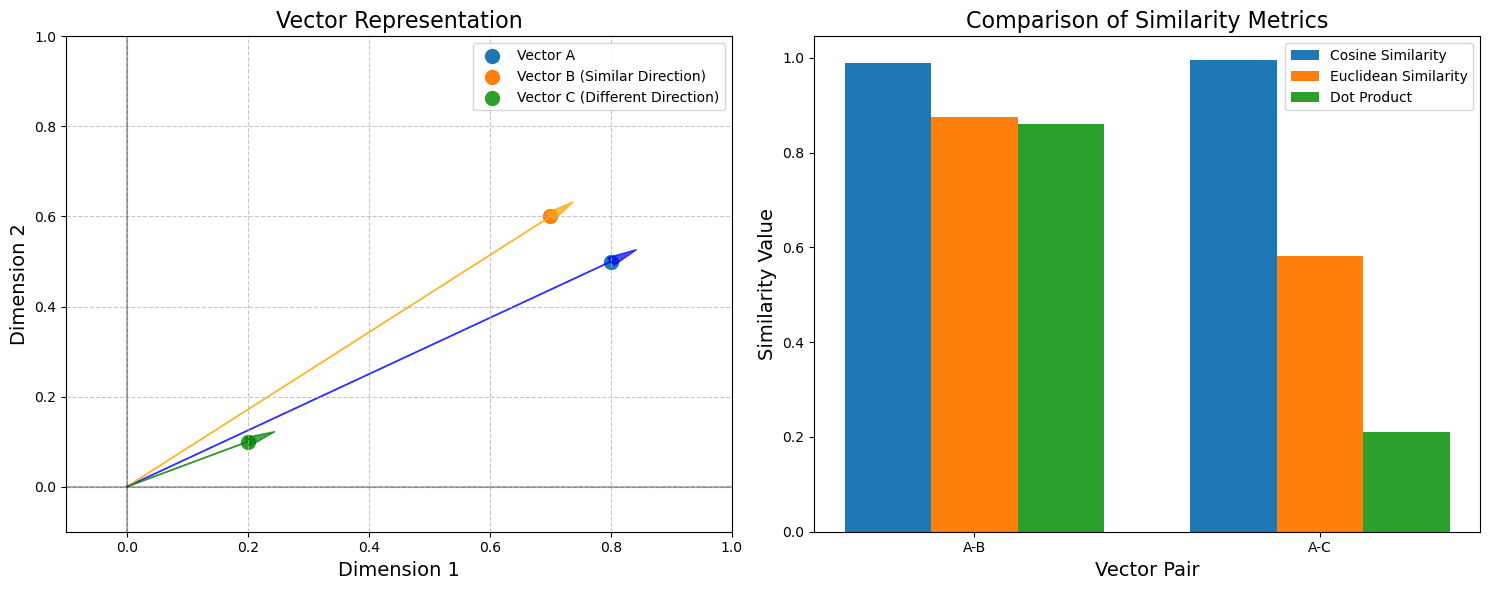

  Vector Pair  Cosine Similarity  Euclidean Similarity  Dot Product
0         A-B           0.988767              0.876101         0.86
1         A-C           0.995495              0.581020         0.21

Observations:
Vectors A and B point in similar directions (cosine similarity: 0.9888)
Vectors A and C point in different directions (cosine similarity: 0.9955)

Euclidean similarity shows A is physically closer to B (0.8761) than to C (0.5810)

Dot product is higher for A-B (0.8600) than A-C (0.2100), 
affected by both direction and magnitude


In [5]:
# Compare different similarity metrics visually
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Create sample vectors
vector_a = np.array([0.8, 0.5])
vector_b = np.array([0.7, 0.6])  # Similar direction to A
vector_c = np.array([0.2, 0.1])  # Different direction from A

# Calculate similarities and distances
cos_sim_ab = cosine_similarity([vector_a], [vector_b])[0][0]
cos_sim_ac = cosine_similarity([vector_a], [vector_c])[0][0]

euc_dist_ab = euclidean_distances([vector_a], [vector_b])[0][0]
euc_dist_ac = euclidean_distances([vector_a], [vector_c])[0][0]
# Convert to similarity (higher is more similar)
euc_sim_ab = 1 / (1 + euc_dist_ab)
euc_sim_ac = 1 / (1 + euc_dist_ac)

dot_prod_ab = np.dot(vector_a, vector_b)
dot_prod_ac = np.dot(vector_a, vector_c)

# Create dataframe for visualization
similarity_data = {
    'Vector Pair': ['A-B', 'A-C'],
    'Cosine Similarity': [cos_sim_ab, cos_sim_ac],
    'Euclidean Similarity': [euc_sim_ab, euc_sim_ac],
    'Dot Product': [dot_prod_ab, dot_prod_ac]
}

df = pd.DataFrame(similarity_data)

# Visualize the similarities
plt.figure(figsize=(15, 6))

# Plot the vectors
plt.subplot(1, 2, 1)
plt.scatter(vector_a[0], vector_a[1], s=100, label='Vector A')
plt.scatter(vector_b[0], vector_b[1], s=100, label='Vector B (Similar Direction)')
plt.scatter(vector_c[0], vector_c[1], s=100, label='Vector C (Different Direction)')

# Draw vectors from origin
plt.arrow(0, 0, vector_a[0], vector_a[1], head_width=0.02, head_length=0.05, fc='blue', ec='blue', alpha=0.7)
plt.arrow(0, 0, vector_b[0], vector_b[1], head_width=0.02, head_length=0.05, fc='orange', ec='orange', alpha=0.7)
plt.arrow(0, 0, vector_c[0], vector_c[1], head_width=0.02, head_length=0.05, fc='green', ec='green', alpha=0.7)

plt.title('Vector Representation', fontsize=16)
plt.xlabel('Dimension 1', fontsize=14)
plt.ylabel('Dimension 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.xlim(-0.1, 1.0)
plt.ylim(-0.1, 1.0)
plt.legend()

# Plot similarity metrics
plt.subplot(1, 2, 2)

bar_width = 0.25
index = np.arange(2)

plt.bar(index, df['Cosine Similarity'], bar_width, label='Cosine Similarity')
plt.bar(index + bar_width, df['Euclidean Similarity'], bar_width, label='Euclidean Similarity')
plt.bar(index + 2*bar_width, df['Dot Product'], bar_width, label='Dot Product')

plt.xlabel('Vector Pair', fontsize=14)
plt.ylabel('Similarity Value', fontsize=14)
plt.title('Comparison of Similarity Metrics', fontsize=16)
plt.xticks(index + bar_width, df['Vector Pair'])
plt.legend()

plt.tight_layout()
plt.show()

# Print the similarity values
print(df)

# Commentary
print("\nObservations:")
print(f"Vectors A and B point in similar directions (cosine similarity: {cos_sim_ab:.4f})")
print(f"Vectors A and C point in different directions (cosine similarity: {cos_sim_ac:.4f})")
print(f"\nEuclidean similarity shows A is physically closer to B ({euc_sim_ab:.4f}) than to C ({euc_sim_ac:.4f})")
print(f"\nDot product is higher for A-B ({dot_prod_ab:.4f}) than A-C ({dot_prod_ac:.4f}), ")
print("affected by both direction and magnitude")

## Building RAG Systems with Embeddings

### RAG architecture overview

Retrieval-Augmented Generation (RAG) combines the power of large language models with a knowledge base to produce more accurate, up-to-date responses.

The basic RAG workflow:

1. **Index phase**: Documents are chunked and embedded, then stored in a vector database
2. **Query phase**: The user query is embedded and used to retrieve relevant documents
3. **Generation phase**: Retrieved documents are provided as context to an LLM to generate a response

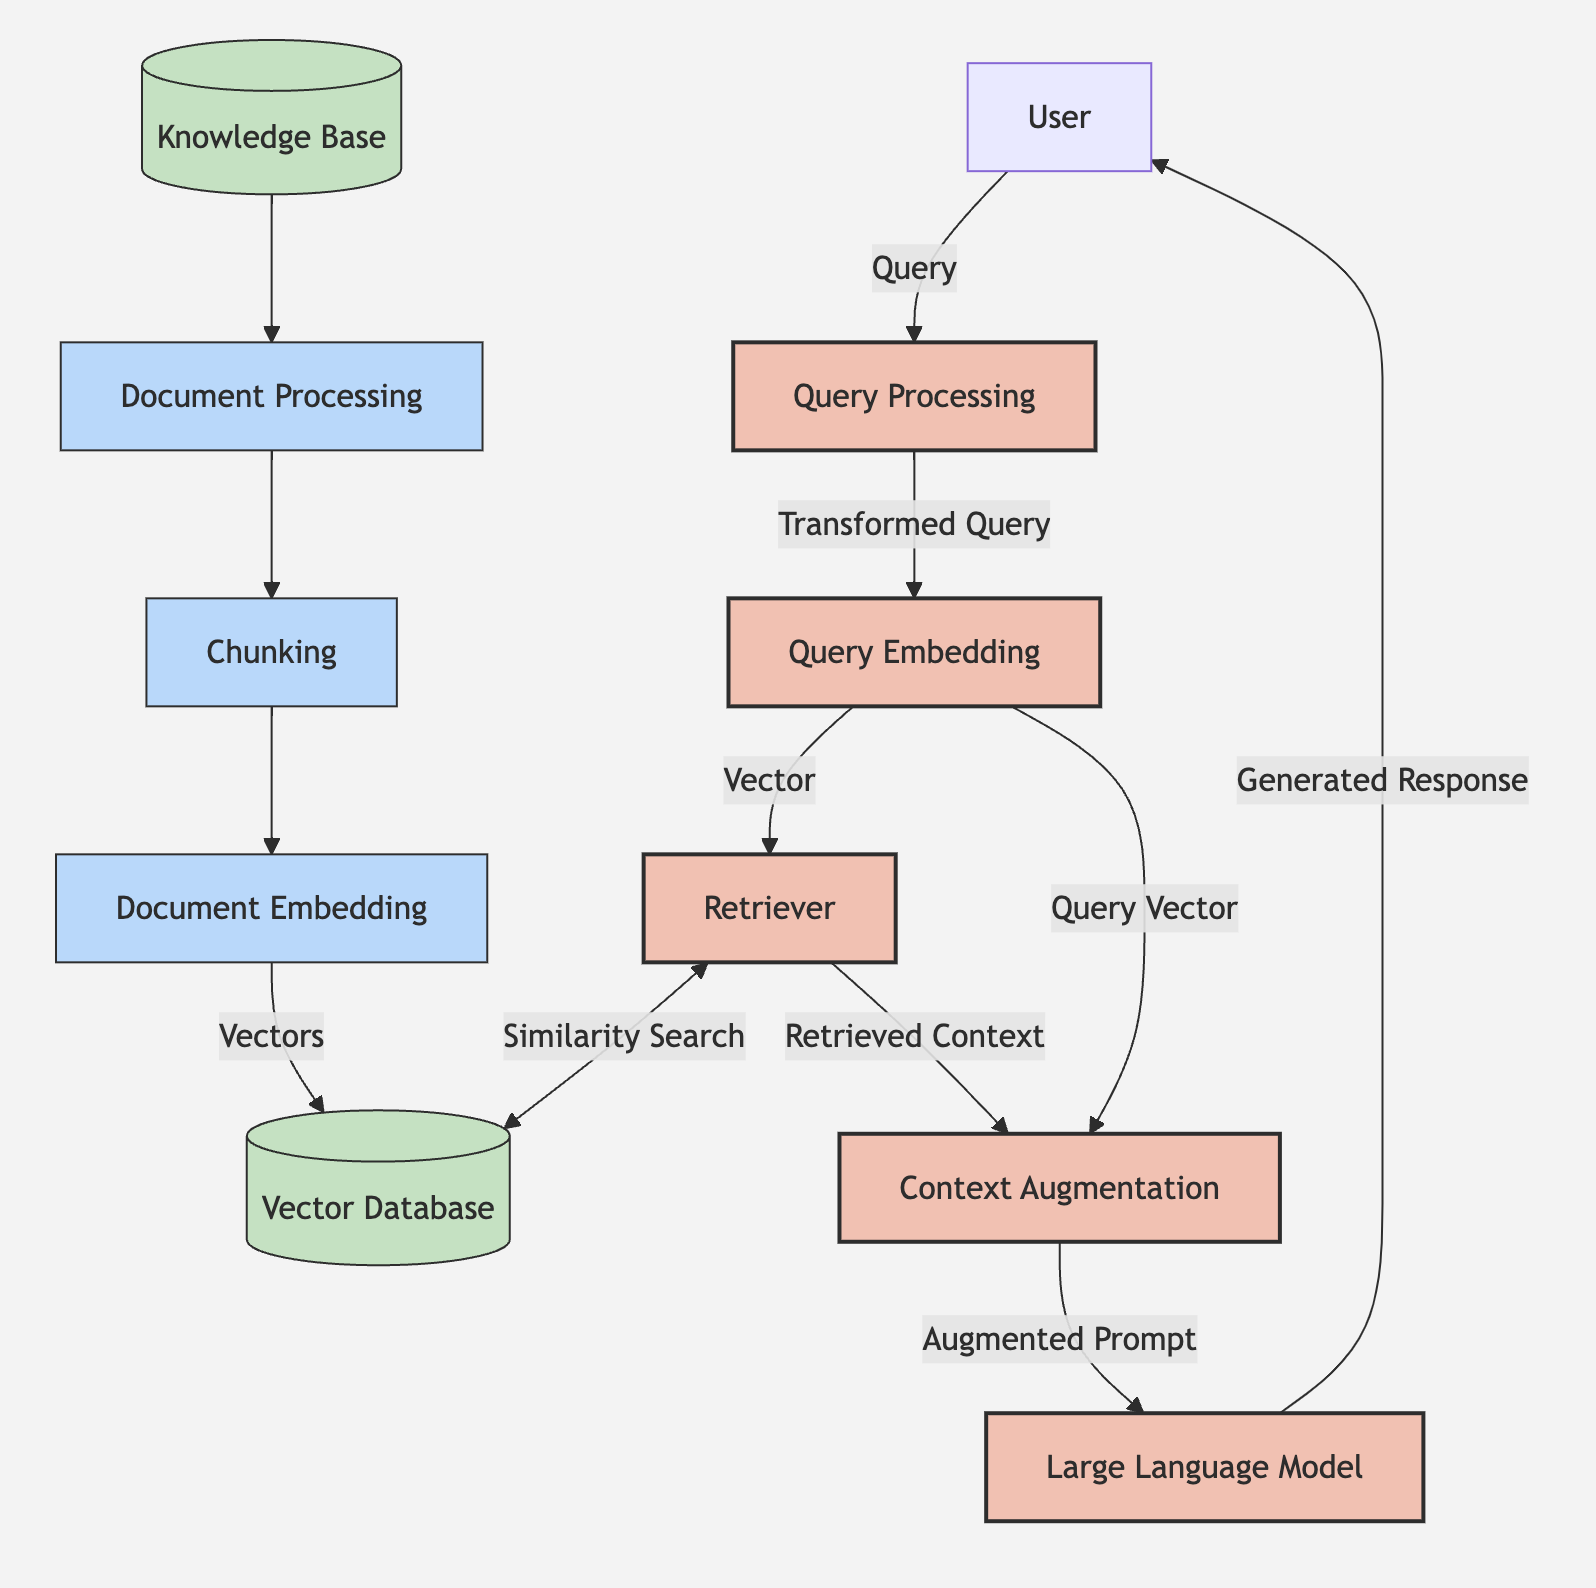

### How embeddings power effective retrieval

Embeddings are critical to RAG systems because they:

1. **Convert semantic meaning to mathematical space** where similarity can be calculated
2. **Enable fuzzy matching** based on meaning rather than exact keywords
3. **Support cross-lingual retrieval** when using multilingual embedding models
4. **Allow for efficient scaling** through vector database optimizations

### Real-world RAG applications and case studies

RAG systems are transforming various industries:

- **Customer support**: Grounding responses in company knowledge bases and support documents
- **Legal and compliance**: Retrieving relevant regulations and precedents
- **Healthcare**: Finding relevant medical literature and records
- **E-commerce**: Enhancing product search and recommendations with detailed product information

For example, LinkedIn uses a RAG system with knowledge graphs for their customer support, improving answer accuracy by over 30% compared to standalone LLMs.

## Practical Decision Guide

### Choosing the right embedding model

Consider these factors when selecting an embedding model:

1. **Application needs**:
   - General search/RAG → all-MiniLM-L6-v2, text-embedding-3-small
   - High-precision needs → text-embedding-3-large, BGE-Large
   - Multilingual applications → paraphrase-multilingual-MPNet

2. **Technical constraints**:
   - Limited storage/memory → Models with smaller dimensions (384-768)
   - Strict latency requirements → Smaller, faster models
   - On-premises requirement → Open-source models

3. **Budget considerations**:
   - Fixed budget → Self-hosted open-source models
   - Pay-as-you-go preference → API-based models with usage-based pricing
   - Enterprise needs → Commercial embedding solutions with SLAs

### Selecting appropriate similarity metrics

Best practices for choosing similarity metrics:

1. **Cosine similarity** (most common choice):
   - Use when document length varies significantly
   - Best for general semantic similarity tasks
   - Standard choice for most RAG applications

2. **Euclidean distance**:
   - Use when absolute positions in embedding space are meaningful
   - Can better distinguish fine-grained differences in some cases
   - Consider for specialized domain applications

3. **Dot product**:
   - Use for computational efficiency at scale
   - Works best when embeddings are normalized
   - Good for very large-scale retrieval systems

### Optimizing for your specific use case

Fine-tuning your embedding approach:

1. **Domain-specific enhancements**:
   - Add domain terminology to queries to improve retrieval
   - Consider fine-tuning embedding models on domain data
   - Test different chunking strategies for your content

2. **Hybrid approaches**:
   - Combine embedding similarity with keyword matching
   - Use filters alongside vector search for precision
   - Implement re-ranking for improved results

3. **Evaluation and improvement**:
   - Test with representative queries from your domain
   - Collect user feedback on retrieval quality
   - Regularly update your knowledge base

## Implementation Considerations

### Storage requirements

Embedding storage needs scale with both content volume and embedding dimensions:

- **Vector size calculation**: Number of vectors × dimensions × 4 bytes (for 32-bit floats)
- **Example**: 1 million documents with 1536-dimension embeddings ≈ 6GB of raw vector data
- **Vector databases** add indexing overhead but enable efficient similarity search

### Performance implications

When implementing embedding-based systems, consider:

- **Embedding creation time**: Factor in the time needed to embed documents and queries
- **Search latency**: Vector similarity search complexity increases with corpus size
- **Batch processing**: Where possible, batch embedding operations for efficiency
- **Caching strategies**: Cache common query embeddings to reduce computation

### Scaling considerations

As your system grows:

- **Indexing techniques** like HNSW or IVF can maintain search performance at scale
- **Distributed vector databases** can handle billions of vectors with sub-second query times
- **Quantization methods** can reduce storage needs by using lower precision (e.g., 8-bit instead of 32-bit)
- **Filtering and pre-filtering** can dramatically improve performance by reducing the search space

## Conclusion and Resources

Embeddings and similarity calculations are essential building blocks for modern AI applications, particularly RAG systems. By understanding these concepts and making informed decisions about models and metrics, you can build more effective, efficient, and accurate systems.

### Key takeaways

1. **Embeddings translate meaning into mathematical space**, allowing machines to understand semantics
2. **Choose embedding models based on your specific needs**, balancing performance, cost, and speed
3. **Cosine similarity is the standard for most applications**, but consider alternatives for specific use cases
4. **RAG systems depend on quality embeddings** for effective retrieval
5. **Consider scaling and performance from the start** for production systems

### Further resources

- [Hugging Face MTEB Leaderboard](https://huggingface.co/spaces/mteb/leaderboard) - Compare embedding model performance
- [OpenAI Embeddings Documentation](https://platform.openai.com/docs/guides/embeddings) - Details on OpenAI's embedding models
- [Sentence Transformers Documentation](https://www.sbert.net/) - Comprehensive guide to open-source embedding models
- [MongoDB RAG Guide](https://www.mongodb.com/developer/products/atlas/choose-embedding-model-rag/) - Practical advice on implementing RAG systems
- [LangChain RAG Documentation](https://python.langchain.com/docs/use_cases/question_answering/) - Framework for building RAG applications

Remember that the best embedding solution depends on your specific use case, data, and requirements. Start with the established defaults, measure performance, and iterate based on real-world results.

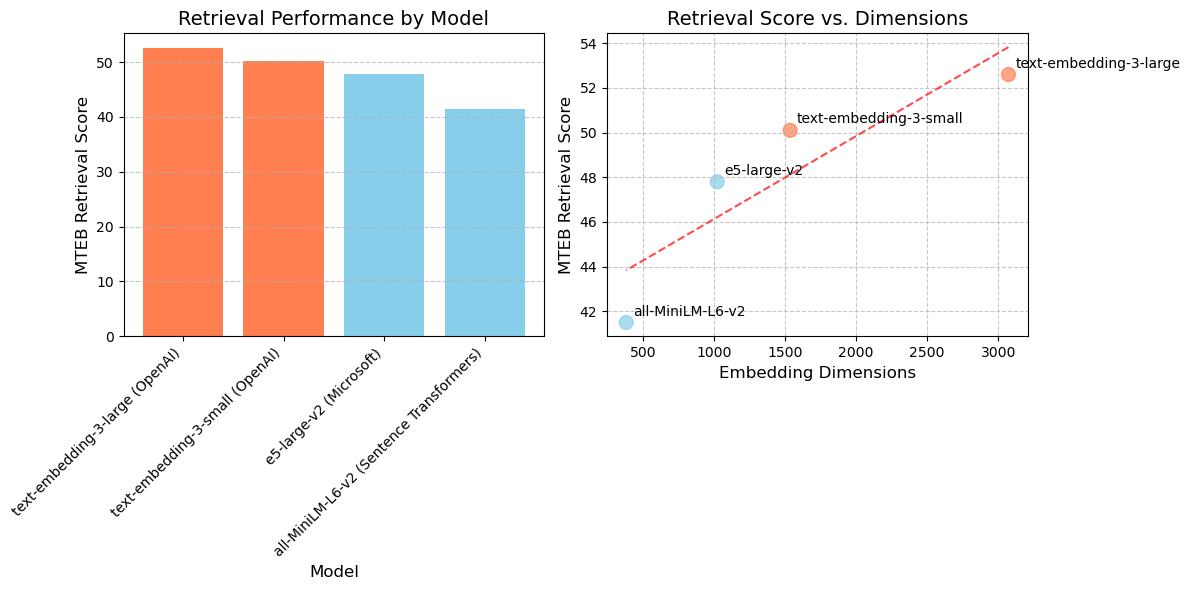


Embedding Model Comparison:
                                      Model  Dimensions  Retrieval Score  \
0           text-embedding-3-large (OpenAI)        3072             52.6   
1           text-embedding-3-small (OpenAI)        1536             50.1   
2                   e5-large-v2 (Microsoft)        1024             47.8   
3  all-MiniLM-L6-v2 (Sentence Transformers)         384             41.5   

   Classification Score         Type    Cost  
0                  64.3  Proprietary    High  
1                  62.8  Proprietary  Medium  
2                  61.2  Open Source    Free  
3                  56.6  Open Source    Free  

Retrieval Efficiency (Score per Dimension):
                                      Model  Retrieval Efficiency
3  all-MiniLM-L6-v2 (Sentence Transformers)             10.807292
2                   e5-large-v2 (Microsoft)              4.667969
1           text-embedding-3-small (OpenAI)              3.261719
0           text-embedding-3-large (OpenAI)   

<Figure size 1000x600 with 0 Axes>

In [8]:
# Compare the performance of different embedding models on retrieval tasks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from MTEB leaderboard (as of March 2025)
embedding_models = [
    {
        'Model': 'text-embedding-3-large (OpenAI)',
        'Dimensions': 3072,
        'Retrieval Score': 52.6,
        'Classification Score': 64.3,
        'Clustering Score': 46.9,
        'Type': 'Proprietary',
        'Cost': 'High'
    },
    {
        'Model': 'text-embedding-3-small (OpenAI)',
        'Dimensions': 1536,
        'Retrieval Score': 50.1,
        'Classification Score': 62.8,
        'Clustering Score': 45.2,
        'Type': 'Proprietary',
        'Cost': 'Medium'
    },
    {
        'Model': 'e5-large-v2 (Microsoft)',
        'Dimensions': 1024,
        'Retrieval Score': 47.8,
        'Classification Score': 61.2,
        'Clustering Score': 43.4,
        'Type': 'Open Source',
        'Cost': 'Free'
    },
    {
        'Model': 'all-MiniLM-L6-v2 (Sentence Transformers)',
        'Dimensions': 384,
        'Retrieval Score': 41.5,
        'Classification Score': 56.6,
        'Clustering Score': 39.8,
        'Type': 'Open Source',
        'Cost': 'Free'
    }
]

# Create DataFrame
df = pd.DataFrame(embedding_models)

# Create a comparison chart for retrieval performance
plt.figure(figsize=(12, 6))

# Set up colors based on model type
colors = []
for t in df['Type']:
    if t == 'Proprietary':
        colors.append('coral')
    else:
        colors.append('skyblue')

# Create bar chart for retrieval performance
plt.subplot(1, 2, 1)
plt.bar(df['Model'], df['Retrieval Score'], color=colors)
plt.title('Retrieval Performance by Model', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MTEB Retrieval Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Create a plot showing the relationship between dimensions and performance
plt.subplot(1, 2, 2)
plt.scatter(df['Dimensions'], df['Retrieval Score'], s=100, c=colors, alpha=0.7)

# Add model names as annotations
for i, row in df.iterrows():
    plt.annotate(row['Model'].split(' ')[0], 
                (row['Dimensions'], row['Retrieval Score']),
                xytext=(5, 5), textcoords='offset points')

# Add a trend line
z = np.polyfit(df['Dimensions'], df['Retrieval Score'], 1)
p = np.poly1d(z)
plt.plot(df['Dimensions'], p(df['Dimensions']), "r--", alpha=0.7)

plt.title('Retrieval Score vs. Dimensions', fontsize=14)
plt.xlabel('Embedding Dimensions', fontsize=12)
plt.ylabel('MTEB Retrieval Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Print a comparison table with all metrics
plt.figure(figsize=(10, 6))

# Create a table for comparison
print("\nEmbedding Model Comparison:")
print(df[['Model', 'Dimensions', 'Retrieval Score', 'Classification Score', 'Type', 'Cost']])

# Calculate efficiency (performance per dimension)
df['Retrieval Efficiency'] = df['Retrieval Score'] / df['Dimensions'] * 100

print("\nRetrieval Efficiency (Score per Dimension):")
print(df[['Model', 'Retrieval Efficiency']].sort_values('Retrieval Efficiency', ascending=False))

print("\nObservation: While larger models generally perform better, smaller models")
print("can be more efficient in terms of performance per dimension.")